In [5]:
import os
import json
import pickle
import ast

import matplotlib as mpl
import matplotlib.pyplot as plt

import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

In [6]:
from datasets import load_from_disk
from datasets import load_dataset
fields = ['art', 'etc', 'social', 'tech']

fd = {}
for field in fields :
    data_files = {"train":os.path.join(field,'train_'+field+'.csv'), "validation": os.path.join(field,'vaild_'+field+'.csv')}
    fd[field] = load_dataset("metamong1/book_summarization", data_files=data_files, use_auth_token=True)

Using custom data configuration metamong1___book_summarization-e25c83056216cfff
Reusing dataset csv (/opt/ml/.cache/huggingface/datasets/csv/metamong1___book_summarization-e25c83056216cfff/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a)


  0%|          | 0/2 [00:00<?, ?it/s]

Using custom data configuration metamong1___book_summarization-bb467c2f172c1cd0
Reusing dataset csv (/opt/ml/.cache/huggingface/datasets/csv/metamong1___book_summarization-bb467c2f172c1cd0/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a)


  0%|          | 0/2 [00:00<?, ?it/s]

Using custom data configuration metamong1___book_summarization-6ccc15672801dfe2
Reusing dataset csv (/opt/ml/.cache/huggingface/datasets/csv/metamong1___book_summarization-6ccc15672801dfe2/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a)


  0%|          | 0/2 [00:00<?, ?it/s]

Using custom data configuration metamong1___book_summarization-03edc23c870850ca
Reusing dataset csv (/opt/ml/.cache/huggingface/datasets/csv/metamong1___book_summarization-03edc23c870850ca/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a)


  0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
fd[field]['validation'][0]

{'file': "['PCY_201508181120134091_18.json', 'PCY_201508181120134091_50.json', 'PCY_201508181120134091_58.json']",
 'doc_id': 'PCY_201508181120134091',
 'doc_type': '도서',
 'title': 'Future Horizon: summer 2015 (제25호)',
 'text': "['본고는 지식정보시대 패러다임 하에서 한국의 과제를 제시하고자 한다. 그런데 시대나 사회의 특징을 담기 위한 개념은 상당한 사회적 반응을 얻는 것에 비해서는 개념의 적확성이 엄밀하지는 않은 경우가 많다. 지식사회, 정보시대, 정보사회와 같은 개념들 역시 실증적이기보다는 선제적 의제의 성격이 강하다고 할 수 있으며 사회적 합의에 도달한 개념이라고 보기도 어렵다. 그럼에도 그 개념들은 대단한 운동성과 영향력을 가지고 있으며 처음 개념들이 제시되고 난 이후 시간이 지나면서 그에 부합한 근거들이 더 풍부해졌다고 할 수 있다. 적어도 일시적 유행어는 아니라는 점에서, 그리고 적어도 위의 개념들을 통해서 사회를 풍부하게 해석해내는 프레임이라는 점에서 존재가치가 있는 개념들이라고 할 수 있다.', '세 번째 구성요소는 ‘계획수립능력(Planning Literacy)이다. 이는 미래에 이러한 변화들이 생길 것이니 현재부터 계획을 세우는 능력이다. 이는 한 개인의 미래에 있어서도 어려운 일인데, 국가의 미래를 위해한 개인이 계획을 세우는 것이 가능한 것이냐 하는 질문이 나올 수 있다. 하지만 여기서 말하는 계획수립능력은 한 개인의 국가계획이 아니라 개개인들이 미래에 대한 변화에 공감을 하면서 개인의 일상에서 소소하게 세워질 수 있는 미래의 계획을 말한다. 분리수거, 에너지 지출 등에 있어서 나의 미래와 전체 사회의 미래를 생각하며 세우는 계획들이 모여 한 사회의 미래를 지탱해주는 것이다.', '영국회사인 Hydrogen Solar는 2005년에 태양에너지수소연료(Solar

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

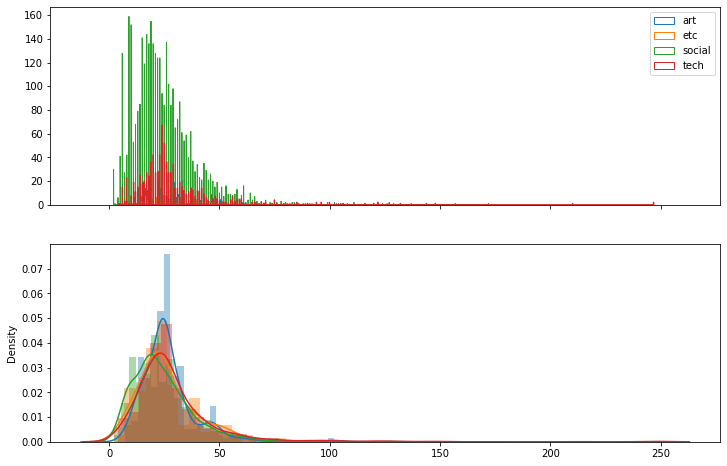

In [8]:
import seaborn as sns
fig, axes = plt.subplots(2,1, figsize=(12, 8), sharex=True)
for i, field  in enumerate(fields) :
    type_counts = list(map(len, fd[field]['train']['title']))
    plt.subplot(2, 1, 1)
    axes[1] = plt.hist(type_counts, bins=len(type_counts), label=field, histtype='step')    
    plt.subplot(2, 1, 2)
    sns.distplot(type_counts)
plt.subplot(2, 1, 1)
plt.legend(fields)
plt.show()

In [9]:
# ' '.join(ast.literal_eval(fd[field]['train']['text']))
list(map(len, [' '.join(l) for l in map(ast.literal_eval, fd[field]['train']['text'])]))[0]

6578

art min: 300
art max: 163024
art mean: 15115.77157360406


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


etc min: 311
etc max: 283975
etc mean: 19898.668874172185


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


social min: 299
social max: 193510
social mean: 12786.868763557484


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


tech min: 299
tech max: 105019
tech mean: 10597.511037527594


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


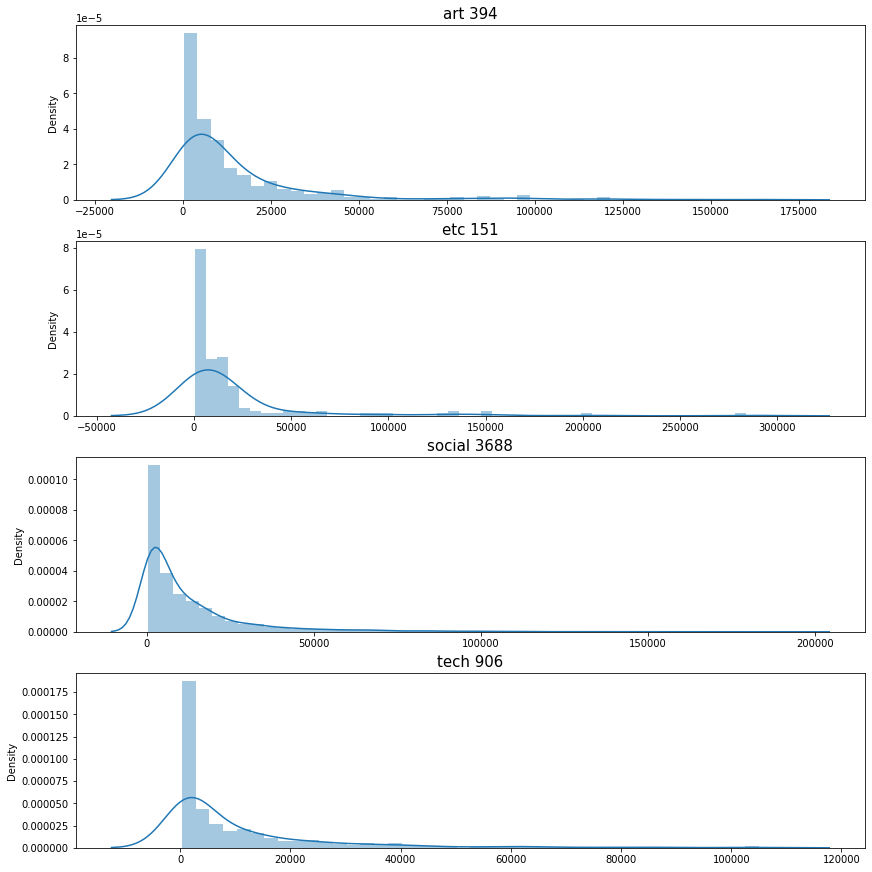

In [10]:
## text length distribution
fig, axes = plt.subplots(4,1, figsize=(12, 12), constrained_layout=True)
for i, field  in enumerate(fields) :
    type_counts = list(map(len, [' '.join(l) for l in map(ast.literal_eval, fd[field]['train']['text'])]))
    print(field, "min:", min(type_counts))
    print(field, "max:", max(type_counts))
    print(field, "mean:", sum(type_counts)/len(type_counts))
    axes[i].set_title(field+' '+str(len(fd[field]['train'])), fontsize=15)
    sns.distplot(type_counts, ax=axes[i])

plt.show()


In [2]:
from konlpy.tag import Mecab

def n_grams(tokens, n):
    l = len(tokens)
    return [tuple(tokens[i:i + n]) for i in range(l) if i + n <= l]

def cal_novel(source, title, n=2):
    tokenizer = Mecab()
    source_tokens = tokenizer.morphs(source)
    title_tokens = tokenizer.morphs(title)
        
    source_grams = set(n_grams(source_tokens, n))
    title_grams = set(n_grams(title_tokens, n))

    joint = title_grams.intersection(source_grams)
    novel = title_grams - joint

    return len(novel), len(title_grams)

        
def cal_novel_repeat(source_lines, title_lines, n=2):
    assert len(source_lines) == len(title_lines)
    
    lines = zip(source_lines, title_lines)
    
    novel_n_grams_prop_list = []
    total_novel_grams_num = 0
    total_title_grams_num = 0
    for source, title in lines:
        novel_grams_num, title_grams_num = cal_novel(source, title)
        novel_n_grams_prop_list.append(novel_grams_num / (title_grams_num + 1e-6))
        total_novel_grams_num += novel_grams_num
        total_title_grams_num += title_grams_num
    return novel_n_grams_prop_list, total_novel_grams_num, total_title_grams_num

In [13]:
origin_text = fd[field]['train']['text']#.apply(lambda l: ' '.join(l) )
title_text = fd[field]['train']['title']

0.6553636839351125


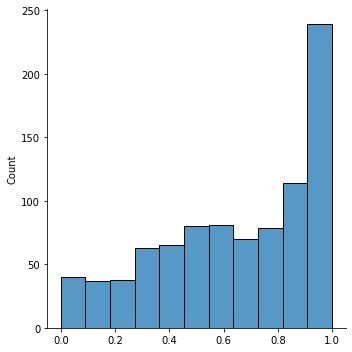

In [14]:
# 1-gram
import seaborn as sns
novel_n_grams_prop_list, total_novel_grams_num, total_title_grams_num = cal_novel_repeat(origin_text, title_text)
print(total_novel_grams_num / total_title_grams_num)
sns.displot(novel_n_grams_prop_list)

In [16]:
cal_novel(' '.join(fd[field]['train']['text'][0]), fd[field]['train']['title'][0])

(61, 63)